# Introduction

The following datasets coming from Kaggle site. We pull the data using the following prodivded codes: 

import kagglehub

#### Download latest version
path = kagglehub.dataset_download("sumitrodatta/nba-aba-baa-stats")

print("Path to dataset files:", path)

In [1]:
import pandas as pd 
import numpy as np
from functools import reduce

import xlsxwriter
import openpyxl

import matplotlib.pyplot as plt
import io

import seaborn as sns

In [2]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:

# Download the latest version
#path = "/Users/oaitran/Desktop/Phd/Fall_2025/DS_7200/final_project/DS_7200_final_project/48/"
file_1 = "Player Career Info.csv"
file_2 = "Player Totals.csv"
file_3 = "Player Award Shares.csv"
file_4 = "Player Per Game.csv"
file_5 = "Player Play By Play.csv"
file_6 = "Player Season Info.csv"
file_7 = "Player Shooting.csv"




player_career_info — Do not use this dataset, as it is not useful and cannot be merged with other datasets.

From below we should have merge keys as: season, player name, player ID to ensure 1-1 merge

In [4]:
player_career_info = pd.read_csv(file_1)
print("This is player_career_info columns:", player_career_info.columns)

player_total = pd.read_csv(file_2)
player_total = player_total.sort_values(by=["season", "player", "player_id"], ascending=[True,True,True])
print("This is player_total columns:", player_total.columns)

player_Award_Shares = pd.read_csv(file_3)
player_Award_Shares = player_Award_Shares.sort_values(by=["season","award", "player", "player_id"], ascending=[True,True,True,True])
print("This is player_Award_Shares columns:", player_Award_Shares.columns)

player_per_game = pd.read_csv(file_4)
player_per_game = player_per_game.sort_values(by=["season", "player", "player_id"], ascending=[True,True,True])
print("This is player_per_game columns:", player_per_game.columns)

player_play_by_play = pd.read_csv(file_5)
player_play_by_play = player_play_by_play.sort_values(by=["season", "player", "player_id"], ascending=[True,True,True])
print("This is player_play_by_play columns:", player_play_by_play.columns)

player_season_info = pd.read_csv(file_6)
player_season_info = player_season_info.sort_values(by=["season", "player", "player_id"], ascending=[True,True,True])
print("This is player_season_info columns:", player_season_info.columns)

player_shooting = pd.read_csv(file_7)
player_shooting = player_shooting.sort_values(by=["season", "player", "player_id"], ascending=[True,True,True])
print("This is player_shooting columns:", player_shooting.columns)


This is player_career_info columns: Index(['player', 'player_id', 'pos', 'ht_in_in', 'wt', 'birth_date',
       'colleges', 'from', 'to', 'debut', 'hof'],
      dtype='object')
This is player_total columns: Index(['season', 'lg', 'player', 'player_id', 'age', 'team', 'pos', 'g', 'gs',
       'mp', 'fg', 'fga', 'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p',
       'x2pa', 'x2p_percent', 'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'trp_dbl'],
      dtype='object')
This is player_Award_Shares columns: Index(['season', 'award', 'player', 'player_id', 'age', 'first', 'pts_won',
       'pts_max', 'share', 'winner'],
      dtype='object')
This is player_per_game columns: Index(['season', 'lg', 'player', 'player_id', 'age', 'team', 'pos', 'g', 'gs',
       'mp_per_game', 'fg_per_game', 'fga_per_game', 'fg_percent',
       'x3p_per_game', 'x3pa_per_game', 'x3p_percent', 'x2p_per_game',
       'x2pa_per_game', 'x2p_percent',

In [5]:
df = [player_total, player_Award_Shares, player_per_game, player_play_by_play, player_season_info, player_shooting]

In [6]:

def common_columns(datasets):
    """
    Find column names that exist in all datasets. This helps with merging df
    
    Parameters:
        datasets (list): List of pandas DataFrames.
    
    Returns:
        set: Columns common to all datasets.
    """
    if not datasets:
        return set()
    
    col_sets = [set(df.columns) for df in datasets]
    return set.intersection(*col_sets)


In [7]:
common_columns(df)

{'age', 'player', 'player_id', 'season'}

In [8]:
player_career_info.head()

player  player_id  pos  ht_in_in     wt  birth_date  \
0    Hank Biasatti  biasaha01    G        71  175.0  1922-01-14   
1     Tommy Byrnes  byrneto01  F-G        75  175.0  1923-02-19   
2   Bob Fitzgerald  fitzgbo01  F-C        77  190.0  1923-03-14   
3  Dick Fitzgerald  fitzgdi01    F        74  175.0  1920-11-18   
4   Frank Fucarino  fucarfr01    F        74  175.0  1920-07-24   

                 colleges  from    to                 debut    hof  
0   Assumption University  1947  1947  1946-11-01T00:00:00Z  False  
1              Seton Hall  1947  1951  1946-11-01T00:00:00Z  False  
2              Seton Hall  1947  1949  1946-11-01T00:00:00Z  False  
3                 Fordham  1947  1948  1946-11-01T00:00:00Z  False  
4  Long Island University  1947  1947  1946-11-01T00:00:00Z  False

In [9]:
player_total.head()

season   lg         player  player_id   age team  pos   g  gs  mp   fg  \
32414    1947  BAA   Al Brightman  brighal01  23.0  BOS  NaN  58 NaN NaN  223   
32502    1947  BAA      Al Lujack  lujacal01  26.0  WSC  NaN   5 NaN NaN    1   
32537    1947  BAA    Al Negratti  negraal01  25.0  WSC  NaN  11 NaN NaN   13   
32536    1947  BAA    Angelo Musi   musian01  28.0  PHW  NaN  60 NaN NaN  230   
32508    1947  BAA  Ariel Maughan  maughar01  23.0  DTF  NaN  59 NaN NaN  224   

       fga  fg_percent  x3p  x3pa  x3p_percent  x2p  x2pa  x2p_percent  \
32414  870       0.256  NaN   NaN          NaN  NaN   NaN          NaN   
32502    8       0.125  NaN   NaN          NaN  NaN   NaN          NaN   
32537   69       0.188  NaN   NaN          NaN  NaN   NaN          NaN   
32536  818       0.281  NaN   NaN          NaN  NaN   NaN          NaN   
32508  929       0.241  NaN   NaN          NaN  NaN   NaN          NaN   

       e_fg_percent   ft  fta  ft_percent  orb  drb  trb  ast  stl  blk  tov  \
32414           NaN  121  193       0.627  NaN  NaN  NaN   60  NaN  NaN  NaN   
32502           NaN    2    5       0.400  NaN  NaN  NaN    0  NaN  NaN  NaN   
32537           NaN    5    8       0.625  NaN  NaN  NaN    5  NaN  NaN  NaN   
32536           NaN  102  123       0.829  NaN  NaN  NaN   26  NaN  NaN  NaN   
32508           NaN   84  114       0.737  NaN  NaN  NaN   57  NaN  NaN  NaN   

          pf  pts  trp_dbl  
32414  115.0  567      0.0  
32502    6.0    4      0.0  
32537   20.0   31      0.0  
32536  120.0  562      0.0  
32508  180.0  532      0.0

In [10]:
player_per_game.head()

season   lg         player  player_id   age team  pos   g  gs  \
32414    1947  BAA   Al Brightman  brighal01  23.0  BOS  NaN  58 NaN   
32502    1947  BAA      Al Lujack  lujacal01  26.0  WSC  NaN   5 NaN   
32537    1947  BAA    Al Negratti  negraal01  25.0  WSC  NaN  11 NaN   
32536    1947  BAA    Angelo Musi   musian01  28.0  PHW  NaN  60 NaN   
32508    1947  BAA  Ariel Maughan  maughar01  23.0  DTF  NaN  59 NaN   

       mp_per_game  fg_per_game  fga_per_game  fg_percent  x3p_per_game  \
32414          NaN          3.8          15.0       0.256           NaN   
32502          NaN          0.2           1.6       0.125           NaN   
32537          NaN          1.2           6.3       0.188           NaN   
32536          NaN          3.8          13.6       0.281           NaN   
32508          NaN          3.8          15.7       0.241           NaN   

       x3pa_per_game  x3p_percent  x2p_per_game  x2pa_per_game  x2p_percent  \
32414            NaN          NaN           NaN            NaN          NaN   
32502            NaN          NaN           NaN            NaN          NaN   
32537            NaN          NaN           NaN            NaN          NaN   
32536            NaN          NaN           NaN            NaN          NaN   
32508            NaN          NaN           NaN            NaN          NaN   

       e_fg_percent  ft_per_game  fta_per_game  ft_percent  orb_per_game  \
32414           NaN          2.1           3.3       0.627           NaN   
32502           NaN          0.4           1.0       0.400           NaN   
32537           NaN          0.5           0.7       0.625           NaN   
32536           NaN          1.7           2.1       0.829           NaN   
32508           NaN          1.4           1.9       0.737           NaN   

       drb_per_game  trb_per_game  ast_per_game  stl_per_game  blk_per_game  \
32414           NaN           NaN           1.0           NaN           NaN   
32502           NaN           NaN           0.0           NaN           NaN   
32537           NaN           NaN           0.5           NaN           NaN   
32536           NaN           NaN           0.4           NaN           NaN   
32508           NaN           NaN           1.0           NaN           NaN   

       tov_per_game  pf_per_game  pts_per_game  
32414           NaN          2.0           9.8  
32502           NaN          1.2           0.8  
32537           NaN          1.8           2.8  
32536           NaN          2.0           9.4  
32508           NaN          3.1           9.0

In [11]:
player_Award_Shares.head()

season    award         player  player_id  age  first  pts_won  pts_max  \
3397    1948  baa roy   Paul Hoffman  hoffmpa01   22    NaN      NaN      NaN   
3396    1949  baa roy  Howie Shannon  shannho01   25    NaN      NaN      NaN   
3395    1950  nba roy     Alex Groza  grozaal01   23    NaN      NaN      NaN   
3394    1951  nba roy    Paul Arizin  arizipa01   22    NaN      NaN      NaN   
3393    1952  nba roy   Bill Tosheff  toshebi01   25    NaN      NaN      NaN   

      share  winner  
3397    NaN    True  
3396    NaN    True  
3395    NaN    True  
3394    NaN    True  
3393    NaN    True

In [12]:
player_play_by_play.head()

season   lg       player  player_id  age team pos   g  gs    mp  \
17142    1997  NBA   A.C. Green  greenac01   33  2TM  PF  83  73  2492   
17143    1997  NBA   A.C. Green  greenac01   33  PHO  PF  27  19   548   
17144    1997  NBA   A.C. Green  greenac01   33  DAL  PF  56  54  1944   
17280    1997  NBA  Aaron McKie  mckieaa01   24  2TM  SG  83  11  1625   
17281    1997  NBA  Aaron McKie  mckieaa01   24  POR  SG  41   8   775   

       pg_percent  sg_percent  sf_percent  pf_percent  c_percent  \
17142         0.0         0.0         4.0        92.0        4.0   
17143         0.0         0.0         6.0        83.0       11.0   
17144         0.0         0.0         4.0        95.0        2.0   
17280        18.0        71.0        11.0         0.0        0.0   
17281        24.0        76.0         0.0         0.0        0.0   

       on_court_plus_minus_per_100_poss  net_plus_minus_per_100_poss  \
17142                              -8.7                         -4.1   
17143                             -11.0                        -13.6   
17144                              -8.1                         -1.5   
17280                               5.9                          0.1   
17281                               0.1                         -5.7   

       bad_pass_turnover  lost_ball_turnover  shooting_foul_committed  \
17142                 26                  20                       56   
17143                  2                   8                       14   
17144                 24                  12                       42   
17280                 46                  15                       64   
17281                 21                  12                       26   

       offensive_foul_committed  shooting_foul_drawn  offensive_foul_drawn  \
17142                         6                   84                   NaN   
17143                         2                   22                   NaN   
17144                         4                   62                   NaN   
17280                        14                   40                   NaN   
17281                         7                   15                   NaN   

       points_generated_by_assists  and1  fga_blocked  
17142                          163    15           41  
17143                           43     4           13  
17144                          120    11           28  
17280                          360     7           36  
17281                          188     4           14

In [13]:
player_season_info.head()

season   lg         player  player_id   age team  pos  experience
12     1947  BAA   Al Brightman  brighal01  23.0  BOS  NaN           1
100    1947  BAA      Al Lujack  lujacal01  26.0  WSC  NaN           1
135    1947  BAA    Al Negratti  negraal01  25.0  WSC  NaN           1
134    1947  BAA    Angelo Musi   musian01  28.0  PHW  NaN           1
106    1947  BAA  Ariel Maughan  maughar01  23.0  DTF  NaN           1

In [14]:
player_shooting.head()

season   lg       player  player_id  age team pos   g  gs    mp  \
17142    1997  NBA   A.C. Green  greenac01   33  2TM  PF  83  73  2492   
17143    1997  NBA   A.C. Green  greenac01   33  PHO  PF  27  19   548   
17144    1997  NBA   A.C. Green  greenac01   33  DAL  PF  56  54  1944   
17280    1997  NBA  Aaron McKie  mckieaa01   24  2TM  SG  83  11  1625   
17281    1997  NBA  Aaron McKie  mckieaa01   24  POR  SG  41   8   775   

       fg_percent  avg_dist_fga  percent_fga_from_x2p_range  \
17142       0.483          11.1                       0.959   
17143       0.477          10.8                       0.977   
17144       0.486          11.4                       0.952   
17280       0.411          14.4                       0.718   
17281       0.340          16.2                       0.647   

       percent_fga_from_x0_3_range  percent_fga_from_x3_10_range  \
17142                        0.444                         0.101   
17143                        0.453                         0.094   
17144                        0.441                         0.104   
17280                        0.340                         0.099   
17281                        0.244                         0.109   

       percent_fga_from_x10_16_range  percent_fga_from_x16_3p_range  \
17142                          0.161                          0.252   
17143                          0.180                          0.250   
17144                          0.154                          0.253   
17280                          0.134                          0.145   
17281                          0.122                          0.173   

       percent_fga_from_x3p_range  fg_percent_from_x2p_range  \
17142                       0.041                      0.502   
17143                       0.023                      0.488   
17144                       0.048                      0.507   
17280                       0.282                      0.416   
17281                       0.353                      0.297   

       fg_percent_from_x0_3_range  fg_percent_from_x3_10_range  \
17142                       0.581                        0.388   
17143                       0.586                        0.417   
17144                       0.580                        0.378   
17280                       0.573                        0.139   
17281                       0.342                        0.235   

       fg_percent_from_x10_16_range  fg_percent_from_x16_3p_range  \
17142                         0.436                         0.451   
17143                         0.391                         0.406   
17144                         0.455                         0.467   
17280                         0.224                         0.415   
17281                         0.158                         0.370   

       fg_percent_from_x3p_range  percent_assisted_x2p_fg  \
17142                      0.050                    0.704   
17143                      0.000                    0.787   
17144                      0.059                    0.674   
17280                      0.398                    0.394   
17281                      0.418                    0.333   

       percent_assisted_x3p_fg  percent_dunks_of_fga  num_of_dunks  \
17142                    0.000                 0.050            24   
17143                      NaN                 0.070             9   
17144                    0.000                 0.042            15   
17280                    0.878                 0.014             5   
17281                    1.000                 0.000             0   

       percent_corner_3s_of_3pa  corner_3_point_percent  num_heaves_attempted  \
17142                     0.050                   0.000                     4   
17143                     0.000                     NaN                     0   
17144                     0.059                   0.000                     4   
17280                     0.214       

In [15]:
# rows and columns before drop duplicates
print("This is player_career_info shape:", player_career_info.shape)

print("This is player_total columns:", player_total.shape)

print("This is player_Award_Shares columns:", player_Award_Shares.shape)

print("This is player_per_game columns:", player_per_game.shape)

print("This is player_play_by_play columns:", player_play_by_play.shape)

print("This is player_season_info columns:", player_season_info.shape)

print("This is player_shooting columns:", player_shooting.shape)


This is player_career_info shape: (5313, 11)
This is player_total columns: (32606, 33)
This is player_Award_Shares columns: (3398, 10)
This is player_per_game columns: (32606, 32)
This is player_play_by_play columns: (17521, 26)
This is player_season_info columns: (32606, 8)
This is player_shooting columns: (17521, 32)


In [16]:
player_total = player_total.drop_duplicates(subset=["season","lg", "player", "player_id", "team"])
print("this is player_total after: ", player_total.shape)

player_per_game = player_per_game.drop_duplicates(subset=["season","lg", "player", "player_id", "team"])
print("this is player_per_game after: ", player_per_game.shape)

player_season_info = player_season_info.drop_duplicates(subset=["season","lg", "player", "player_id", "team"])
print("this is player_season_info after: ", player_season_info.shape)

player_Award_Shares = player_Award_Shares.drop_duplicates(subset=["season","award", "player", "player_id"])
print("this is player_Award_Shares after: ", player_Award_Shares.shape)

player_play_by_play = player_play_by_play.drop_duplicates(subset=["season","lg", "player", "player_id", "team"])
print("this is player_play_by_play after: ", player_play_by_play.shape)

player_shooting = player_shooting.drop_duplicates(subset=["season","lg", "player", "player_id", "team"])
print("this is player_shooting after: ", player_shooting.shape)

this is player_total after:  (32606, 33)
this is player_per_game after:  (32606, 32)
this is player_season_info after:  (32606, 8)
this is player_Award_Shares after:  (3398, 10)
this is player_play_by_play after:  (17521, 26)
this is player_shooting after:  (17521, 32)


## EDA -

Data exploration

In [17]:
player_total.describe()

season           age             g            gs            mp  \
count  32606.000000  32586.000000  32606.000000  24451.000000  31523.000000   
mean    1995.724621     26.477475     48.623198     22.619034   1157.289884   
std       20.682288      3.854600     26.615088     28.017688    925.329661   
min     1947.000000     18.000000      1.000000      0.000000      0.000000   
25%     1980.000000     24.000000     24.000000      0.000000    309.000000   
50%     1999.000000     26.000000     54.000000      7.000000    983.000000   
75%     2013.000000     29.000000     74.000000     42.000000   1885.000000   
max     2025.000000     46.000000     90.000000     84.000000   3882.000000   

                 fg           fga    fg_percent           x3p          x3pa  \
count  32606.000000  32606.000000  32445.000000  26254.000000  26253.000000   
mean     187.571521    414.421395      0.430274     26.428544     75.152554   
std      184.679871    391.161844      0.101825     43.349082    115.182492   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       37.000000     90.000000      0.390000      0.000000      2.000000   
50%      131.000000    301.000000      0.438000      4.000000     17.000000   
75%      286.000000    636.000000      0.481000     35.000000    105.000000   
max     1597.000000   3159.000000      1.000000    402.000000   1028.000000   

        x3p_percent           x2p          x2pa   x2p_percent  e_fg_percent  \
count  22032.000000  26254.000000  26254.000000  26023.000000  26112.000000   
mean       0.262286    154.430868    317.053211      0.467362      0.472313   
std        0.171362    164.350454    328.941367      0.110093      0.105618   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.154000     26.000000     58.000000      0.427000      0.436000   
50%        0.307000     98.000000    206.000000      0.473000      0.481000   
75%        0.368000    230.000000    475.000000      0.515000      0.522000   
max        1.000000   1086.000000   2213.000000      1.000000      1.500000   

                 ft           fta    ft_percent           orb           drb  \
count  32606.000000  32606.000000  31272.000000  27960.000000  27960.000000   
mean      96.107066    128.068055      0.722397     59.224607    144.862053   
std      110.291821    141.916967      0.143875     67.122121    146.300882   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       16.000000     23.000000      0.660000     11.000000     32.000000   
50%       57.000000     79.000000      0.746000     35.000000    103.000000   
75%      138.000000    187.000000      0.813000     84.000000    209.000000   
max      840.000000   1363.000000      1.000000    587.000000   1111.000000   

                trb           ast           stl           blk           tov  \
count  31712.000000  32606.000000  27004.000000  27006.000000  26970.000000   
mean     216.239752    109.536496     37.765405     23.240835     70.435669   
std      223.624978    131.175644     37.255317     35.068121     67.273856   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       48.000000     17.000000      8.000000      3.000000     16.000000   
50%      151.500000     64.000000     27.000000     11.000000     51.000000   
75%      307.000000    152.000000     56.000000     28.000000    107.000000   
max     2149.000000   1164.000000    346.000000    456.000000    464.000000   

                 pf           pts       trp_dbl  
count  32605.000000  32606.000000  32601.000000  
mean     109.200092    492.530086      0.107727  
std       83.369852    486.372033      0.956278  
min        0.000000      0.000000      0.000000  
25%       34.000000     98.000000      0.000000  
50%       98.000000    342.000000      0.000000  
75%      172.000000    751.000000      0.000000  
max      386.000000   4029.000000     42.000000

In [18]:
def describe_to_excel(datasets, filename="descriptions.xlsx", names=None):
    """
    Run .describe() on multiple datasets and save results into one Excel file,
    separated by two blank rows with labels.

    Parameters
    ----------
    datasets : list of pd.DataFrame
        List of DataFrames to summarize.
    filename : str, default "descriptions.xlsx"
        Output Excel filename.
    names : list of str, optional
        Names to label each dataset. Must match the length of datasets.
        If None, defaults to "Dataset 1", "Dataset 2", etc.
    """
    if names is None:
        names = [f"Dataset {i}" for i in range(1, len(datasets) + 1)]
    elif len(names) != len(datasets):
        raise ValueError("Length of names list must match number of datasets")

    with pd.ExcelWriter(filename, engine="xlsxwriter") as writer:
        row = 0
        for name, df in zip(names, datasets):
            # Label row
            label_text = pd.DataFrame([[name]])
            label_text.to_excel(writer, sheet_name="Summary", startrow=row, index=False, header=False)
            row += 1

            # Describe block
            desc = df.describe(include="all").transpose()
            desc.to_excel(writer, sheet_name="Summary", startrow=row, index=True)

            # Move row pointer down (block height + 2 blank rows)
            row += len(desc) + 3

    print(f"Saved descriptions for {len(datasets)} datasets to '{filename}'")

    

def scatter_all_vars_grouped(df, x="player"):
    """
    Create scatter plots of all numeric columns grouped by 'player'.
    Each player gets a single point (aggregated, mean by default).

    Parameters
    ----------
    df : pd.DataFrame
        Dataset to plot.
    x : str, default "player"
        Column to use for x-axis.
    """
    # Group by player and take mean of numeric values
    grouped = df.groupby(x).mean(numeric_only=True).reset_index()
    numeric_cols = grouped.select_dtypes(include="number").columns

    for col in numeric_cols:
        plt.figure(figsize=(10, 5))
        plt.scatter(grouped[x], grouped[col], alpha=0.7)
        plt.title(f"{col} by {x} (grouped)")
        plt.xlabel(x)
        plt.ylabel(col)
        plt.xticks(rotation=90)  # vertical labels if many names
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.show()
        
def scatter_all_vars_timeline(df, time_col="season", group_col="player"):
    """
    Create scatter plots for all numeric columns across a timeline (e.g., season).
    Groups by season and player, then averages values if multiple rows.
    
    Parameters
    ----------
    df : pd.DataFrame
        Dataset containing a time column and player column.
    time_col : str, default "season"
        Column to use as timeline (x-axis).
    group_col : str, default "player"
        Column to group by (legend).
    """
    # Group by season + player
    grouped = df.groupby([time_col, group_col]).mean(numeric_only=True).reset_index()
    numeric_cols = grouped.select_dtypes(include="number").columns.drop(time_col, errors="ignore")

    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        for player, data in grouped.groupby(group_col):
            plt.scatter(data[time_col], data[col], label=player, alpha=0.7)
            plt.plot(data[time_col], data[col], alpha=0.5)  # connect points
            
        plt.title(f"{col} over {time_col}")
        plt.xlabel(time_col)
        plt.ylabel(col)
#        plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.show()
        
def missing_summary(df):
    """
    Return a summary of missing values per column.

    Parameters
    ----------
    df : pd.DataFrame
        Dataset to check.

    Returns
    -------
    pd.DataFrame
        Table with columns: variable, missing_count, missing_percent
    """
    total_rows = len(df)
    summary = (
        df.isna()
          .sum()
          .reset_index()
          .rename(columns={"index": "variable", 0: "missing_count"})
    )
    summary["missing_percent"] = (summary["missing_count"] / total_rows * 100).round(2)
    return summary.sort_values(by="missing_count", ascending=False).reset_index(drop=True)

def hist_all_vars(df, bins=20):
    """
    Plot histograms for all numeric variables in a dataset.

    Parameters
    ----------
    df : pd.DataFrame
        Dataset to plot.
    bins : int, default 20
        Number of histogram bins.
    """
    numeric_cols = df.select_dtypes(include="number").columns

    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        plt.hist(df[col].dropna(), bins=bins, alpha=0.7, color="skyblue", edgecolor="black")
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(axis="y", linestyle="--", alpha=0.5)
        plt.show()

In [19]:
describe_to_excel(
    [player_total, player_Award_Shares, player_per_game, player_play_by_play, player_season_info, player_shooting],
    filename="nba_described01.xlsx",
    names=["player_total", "player_Award_Shares", "player_per_game", "player_play_by_play", "player_season_info", "player_shooting"]
)

Saved descriptions for 6 datasets to 'nba_described01.xlsx'


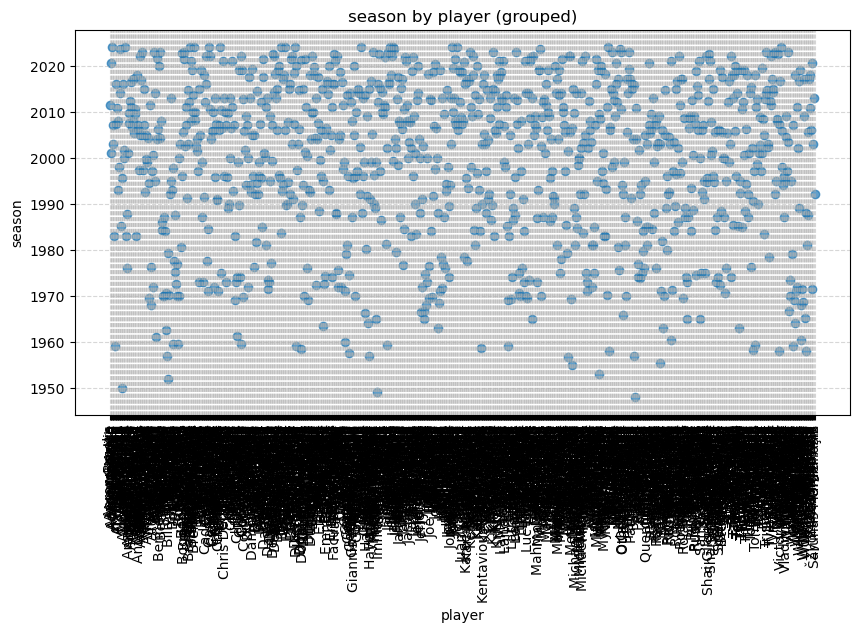

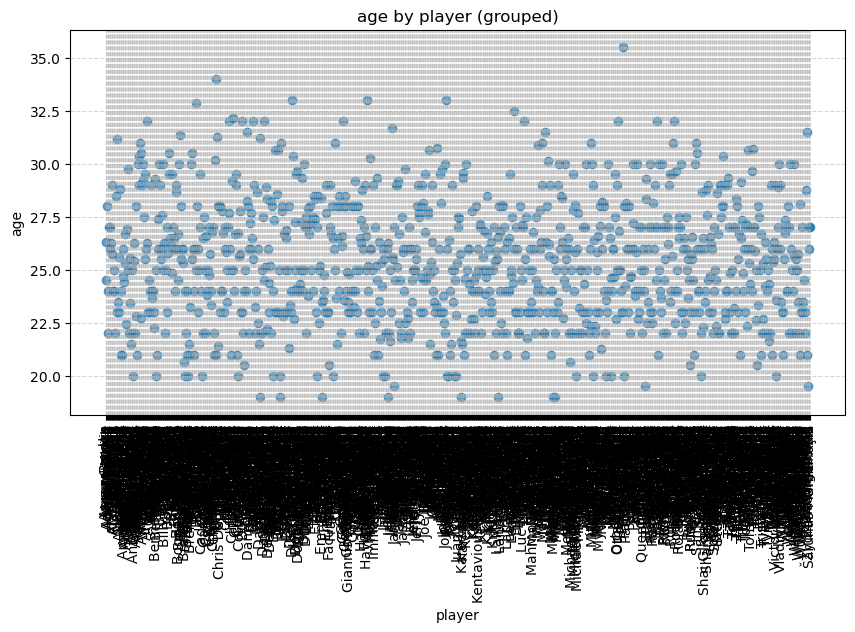

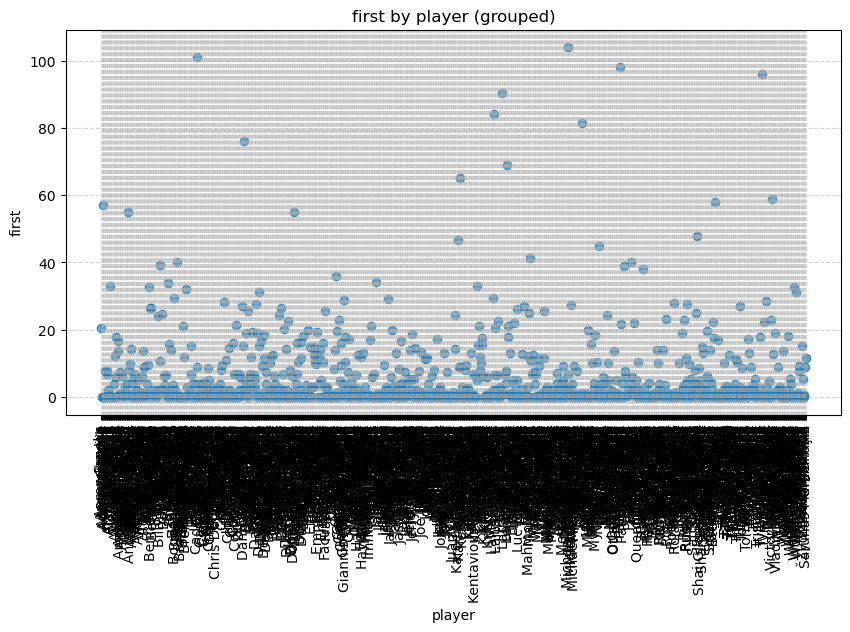

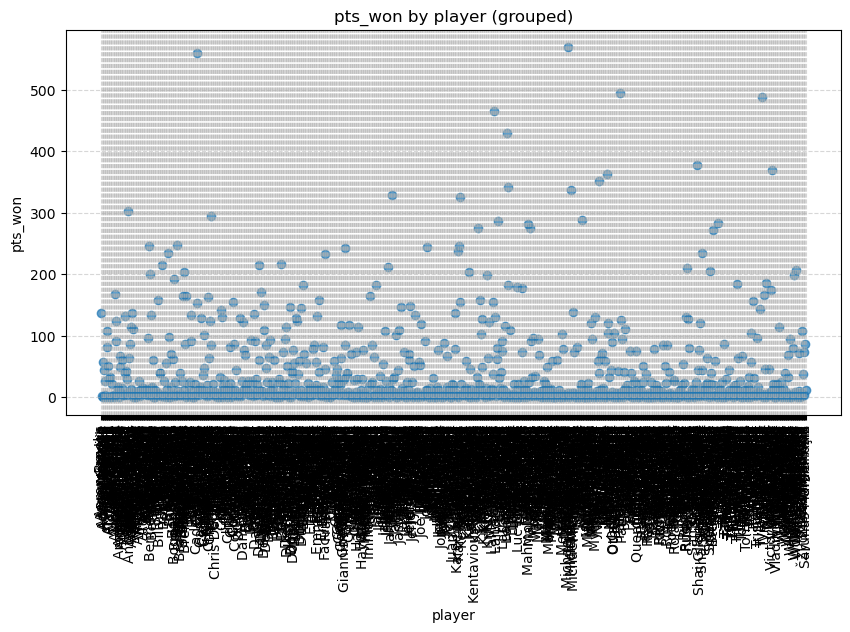

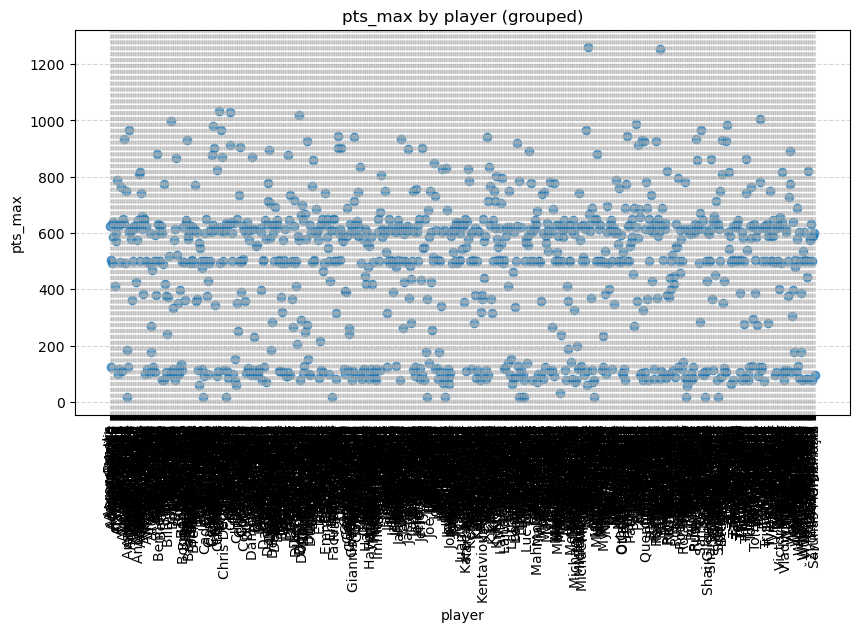

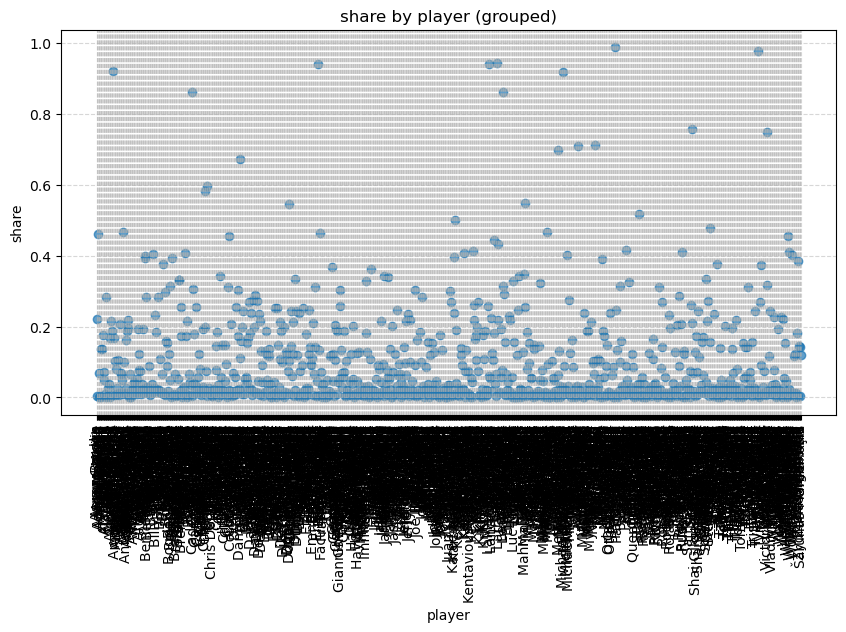

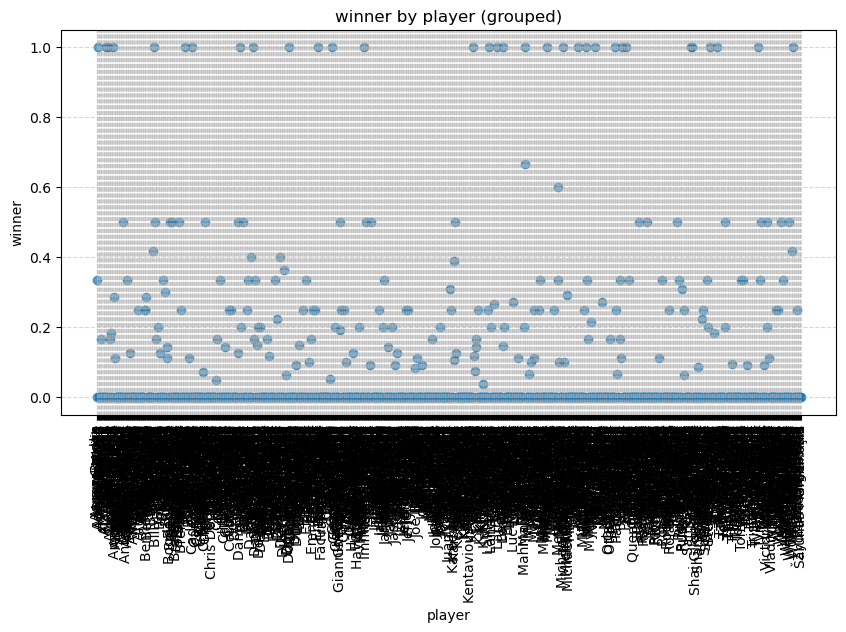

In [20]:
scatter_all_vars_grouped(player_Award_Shares, x="player")

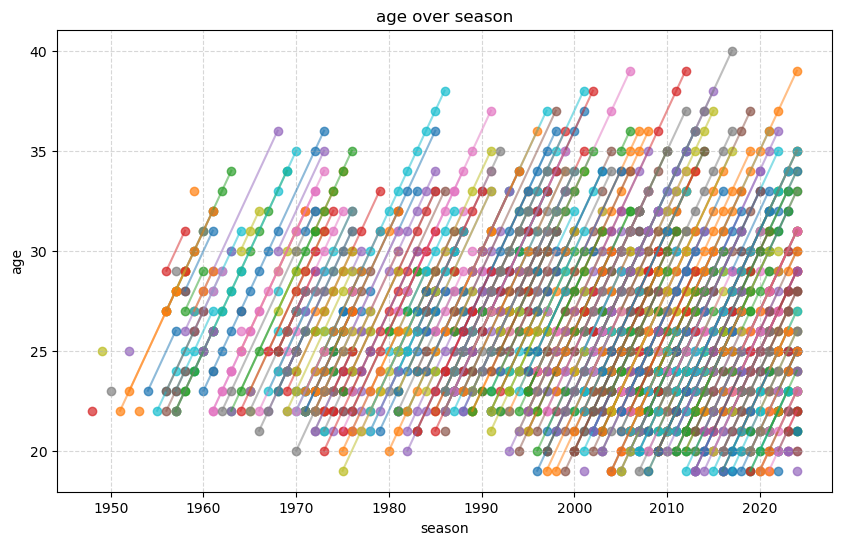

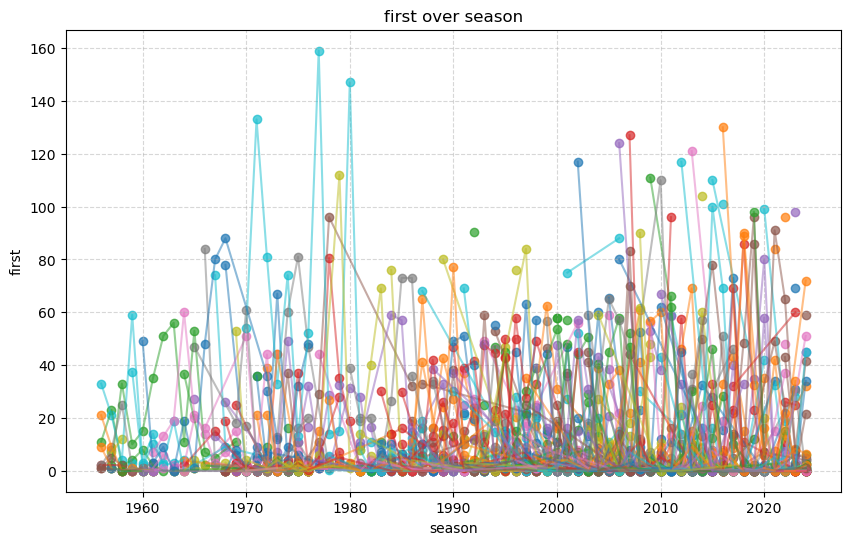

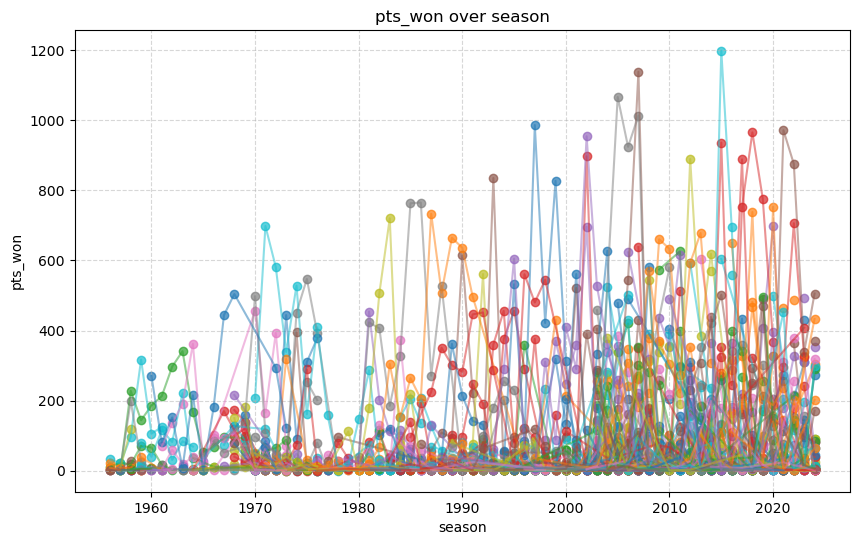

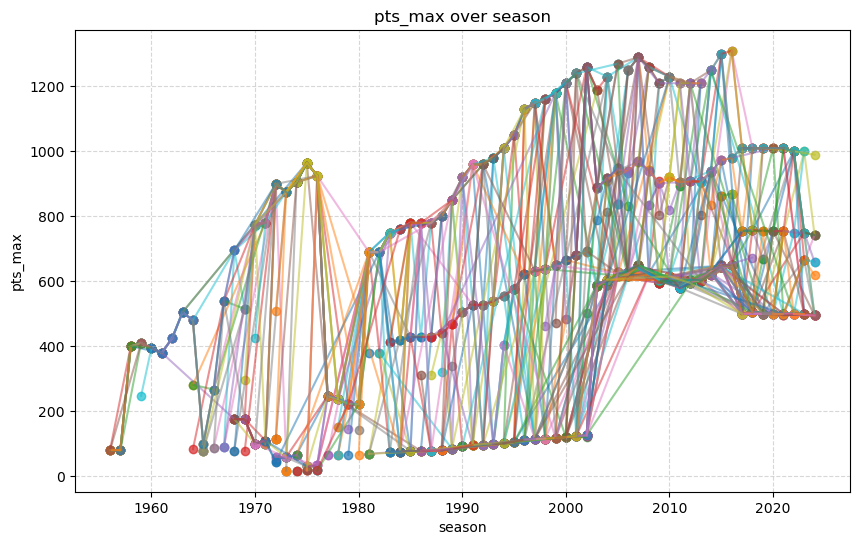

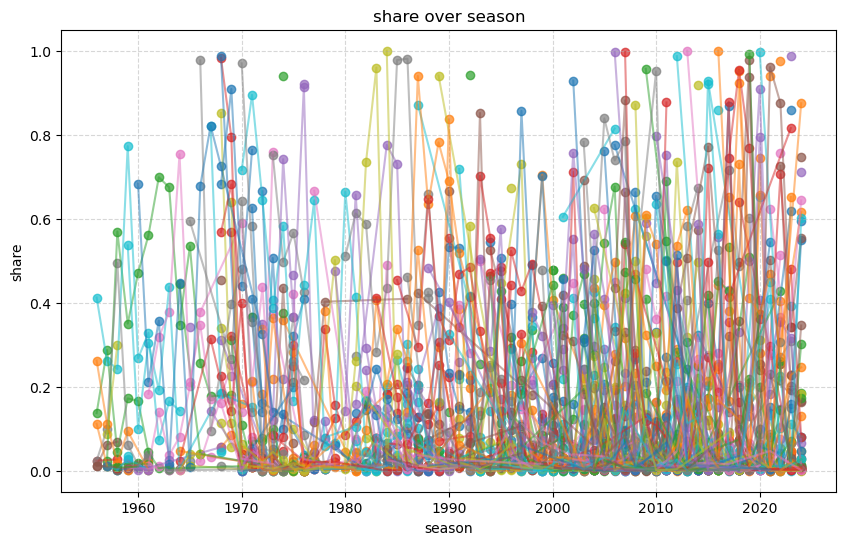

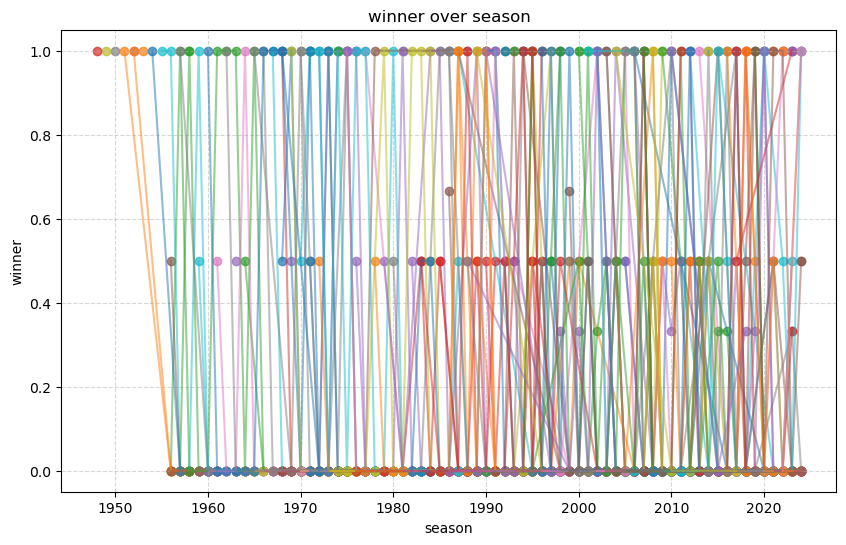

In [21]:
scatter_all_vars_timeline(player_Award_Shares, time_col="season", group_col="player")

In [22]:
missing_summary(player_Award_Shares)

variable  missing_count  missing_percent
0      first             39             1.15
1    pts_won             23             0.68
2    pts_max             23             0.68
3      share             23             0.68
4  player_id              1             0.03
5     season              0             0.00
6      award              0             0.00
7     player              0             0.00
8        age              0             0.00
9     winner              0             0.00

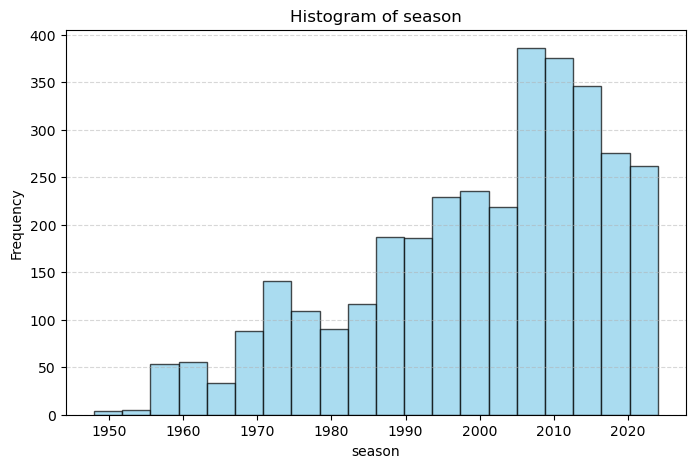

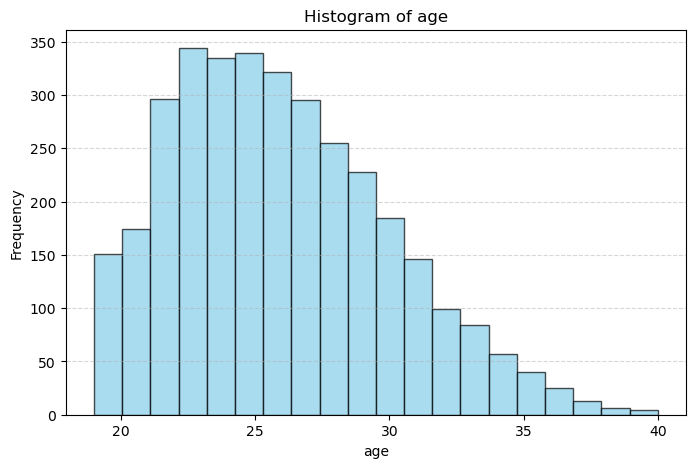

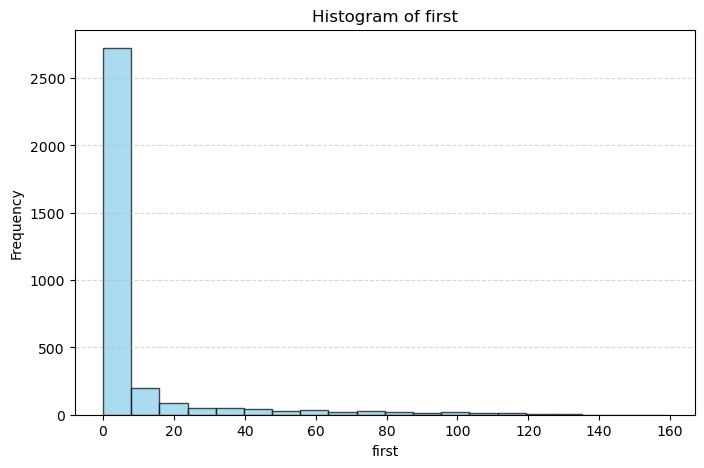

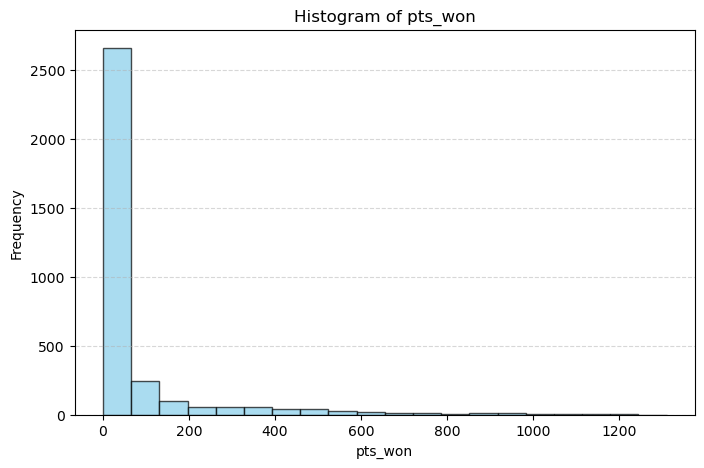

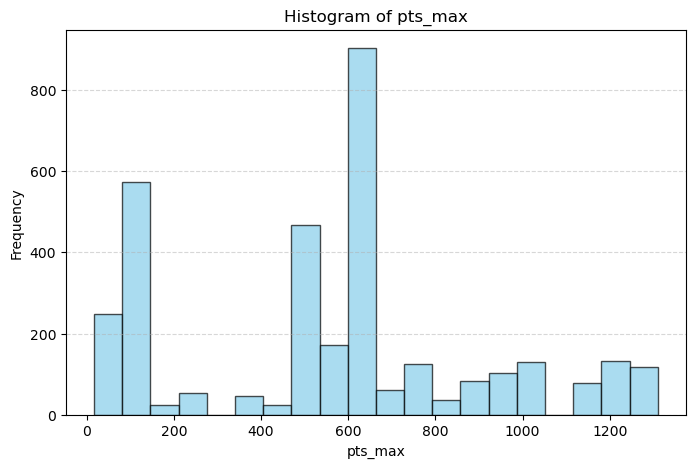

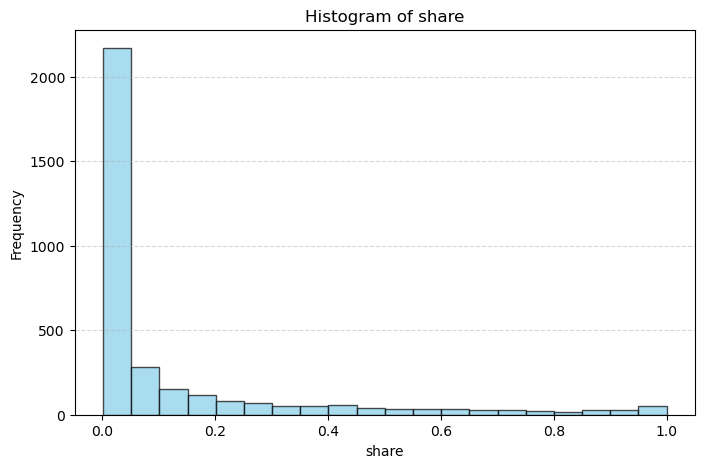

In [23]:
hist_all_vars(player_Award_Shares, bins=20)

In [ ]:
player_Award_Shares.corr(numeric_only=True).style.background_gradient(cmap="coolwarm")
sns.heatmap(player_Award_Shares.corr(numeric_only=True), annot=False, cmap="coolwarm")
player_Award_Shares.groupby("season").mean(numeric_only=True)

#### Merge data

def merge_list_df(base_df, other_dfs, on, how="inner", show=True):
    """
    Merging multiple dataset

    parameters:
        base_df - base dataset we aim to merge 
        other_dfs - list of df to merge 
        on - join key
        how - type of merge, options are inner, outer, left, right. Default is inner
        show - print the result at each stage

    return:
        final merged dataframe
    """

    merged = base_df.copy()
    stages = [("Base DataFrame", merged.copy())]
    
    for i, df in enumerate(other_dfs, start=1):
        merged = merged.merge(
            df, on=on, how=how, suffixes=("", f"_df{i}")
        )
        stages.append((f"After merging with df{i}", merged.copy()))
        if show:
            print(f"\n--- Stage {i}: After merging with df{i} ---")
            print(merged.head())
    
    return merged, stages


    

This is player_total columns: (32606, 33)
This is player_career_info shape: (5313, 11)

This is player_Award_Shares columns: (3398, 10)
This is player_per_game columns: (32606, 32)
This is player_play_by_play columns: (17521, 26)
This is player_Award_Shares columns: (32606, 8)
This is player_per_game columns: (17521, 32)

In [ ]:
common_columns([player_total,player_career_info])


def plots_to_pdf(datasets, filename="plots.pdf", names=None):
    """
    Create plots for multiple datasets (player on x-axis) 
    and save them all into one PDF.
    
    Parameters
    ----------
    datasets : list of pd.DataFrame
        List of DataFrames to plot.
    filename : str, default "plots.pdf"
        Output PDF filename.
    names : list of str, optional
        Names to label each dataset. Must match length of datasets.
        If None, defaults to "Dataset 1", "Dataset 2", etc.
    """
    if names is None:
        names = [f"Dataset {i}" for i in range(1, len(datasets) + 1)]
    elif len(names) != len(datasets):
        raise ValueError("Length of names list must match number of datasets")

    with PdfPages(filename) as pdf:
        for name, df in zip(names, datasets):
            # Plot each numeric column with player on x-axis
            for col in df.select_dtypes(include="number").columns:
                fig, ax = plt.subplots(figsize=(8, 5))
                df.plot(kind="bar", x="player", y=col, ax=ax, legend=False)
                ax.set_title(f"{name} - {col}")
                ax.set_ylabel(col)
                plt.xticks(rotation=45, ha="right")

                pdf.savefig(fig, bbox_inches="tight")  # save to PDF
                plt.close(fig)

    print(f"Saved plots for {len(datasets)} datasets to '{filename}'")
    

plots_to_pdf(
    [player_total],
    filename="nba_plots.pdf",
    names=["player_total"]
)

"""
def scatter_all_vars(df, x="player"):

    Create scatter plots of all numeric columns against a categorical column (default: 'player').

    Parameters
    ----------
    df : pd.DataFrame
        Dataset to plot.
    x : str, default "player"
        Column to use for x-axis.

    numeric_cols = df.select_dtypes(include="number").columns
    
    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        plt.scatter(df[x], df[col], alpha=0.7)
        plt.title(f"{col} by {x}")
        plt.xlabel(x)
        plt.ylabel(col)
        plt.xticks(rotation=45, ha="right")
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.show()
"""